In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install pyyaml==5.4.1
!pip install pycaret[full]
# !pip install shap

     |████████████████████████████████| 636 kB 9.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 288 kB 8.8 MB/s 
     |████████████████████████████████| 261 kB 89.6 MB/s 
     |████████████████████████████████| 2.0 MB 100.5 MB/s 
     |████████████████████████████████| 167 kB 91.2 MB/s 
     |████████████████████████████████| 15.5 MB 64.3 MB/s 
     |████████████████████████████████| 56 kB 6.8 MB/s 
     |████████████████████████████████| 1.3 MB 91.1 MB/s 
     |████████████████████████████████| 1.7 MB 92.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 75.2 MB/s 
     |████████████████████████████████| 86 kB 8.7 MB/s 
     |████████████████████████████████| 113 kB 7

In [3]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler, RobustScaler

from pycaret.classification import *
# from pycaret.anomaly import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
folder_path = '/content/gdrive/MyDrive/0.competition/dataset/'

labeled = pd.read_csv(folder_path+'cn7_labeled_with_reason.csv', index_col=0)  #, low_memory=False
unlabeled = pd.read_csv(folder_path+'cn7_unlabeled.csv', index_col=0)

In [6]:
#Reason별로 짤라야한다.
#1. Reason = 하나 
labeled_initial = labeled[(labeled['Reason']=='초기허용불량') | (labeled['Reason']=='None')]
labeled_initial = labeled_initial.drop(columns={'Reason'})

#2. Reason = 둘
labeled_gas = labeled[(labeled['Reason']=='가스') | (labeled['Reason']=='None')]
labeled_gas = labeled_gas.drop(columns={'Reason'})

#3. Reason = 셋
labeled_unplastic = labeled[(labeled['Reason']=='미성형') | (labeled['Reason']=='None')]
labeled_unplastic = labeled_unplastic.drop(columns={'Reason'})

In [7]:
data_ = labeled_gas

In [8]:
labeled_train_data = data_.sample(frac=0.8, random_state=2021)
labeled_test_data = data_.drop(labeled_train_data.index)

In [9]:
data = setup(labeled_train_data, target = 'LABEL', numeric_features = ['Clamp_Open_Position'], remove_perfect_collinearity = False,
             normalize = True, normalize_method = 'robust',
             fix_imbalance = True)

,Description,Value
0,session_id,3374
1,Target,LABEL
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5368, 25)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
randfor = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9973,0.4840,0.0,0.0,0.0,0.0000,0.0000
1,0.9973,0.9840,0.0,0.0,0.0,0.0000,0.0000
2,0.9894,0.9813,0.0,0.0,0.0,-0.0040,-0.0046
3,0.9973,0.9680,0.0,0.0,0.0,0.0000,0.0000
4,0.9973,0.9880,0.0,0.0,0.0,0.0000,0.0000
5,0.9920,0.9947,0.0,0.0,0.0,-0.0036,-0.0038
6,0.9973,0.9813,0.0,0.0,0.0,0.0000,0.0000
7,1.0000,0.0000,0.0,0.0,0.0,NaN,0.0000
8,1.0000,0.0000,0.0,0.0,0.0,NaN,0.0000
9,0.9973,0.0000,0.0,0.0,0.0,0.0000,0.0000


In [11]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9973,0.9547,0.0,0.0000,0.00,0.000,0.0000
1,0.9973,0.9947,0.0,0.0000,0.00,0.000,0.0000
2,0.9894,0.9893,0.0,0.0000,0.00,-0.004,-0.0046
3,0.9973,0.9973,0.0,0.0000,0.00,0.000,0.0000
4,0.9973,0.9920,0.0,0.0000,0.00,0.000,0.0000
5,0.9947,0.9947,1.0,0.3333,0.50,0.498,0.5758
6,0.9973,0.9707,0.0,0.0000,0.00,0.000,0.0000
7,1.0000,0.0000,0.0,0.0000,0.00,NaN,0.0000
8,1.0000,0.0000,0.0,0.0000,0.00,NaN,0.0000
9,0.9973,0.0000,0.0,0.0000,0.00,0.000,0.0000


In [12]:
adb = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9973,0.2000,0.0,0.0,0.0,0.0000,0.0000
1,0.9973,0.9520,0.0,0.0,0.0,0.0000,0.0000
2,0.9894,0.9893,0.0,0.0,0.0,-0.0040,-0.0046
3,0.9973,0.8560,0.0,0.0,0.0,0.0000,0.0000
4,0.9973,0.9893,0.0,0.0,0.0,0.0000,0.0000
5,0.9920,0.9947,0.0,0.0,0.0,-0.0036,-0.0038
6,0.9947,0.9173,0.0,0.0,0.0,-0.0027,-0.0027
7,1.0000,0.0000,0.0,0.0,0.0,NaN,0.0000
8,1.0000,0.0000,0.0,0.0,0.0,NaN,0.0000
9,0.9973,0.0000,0.0,0.0,0.0,0.0000,0.0000


In [13]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9973,0.4853,0.0,0.0000,0.00,0.0000,0.0000
1,0.9947,0.9813,0.0,0.0000,0.00,-0.0027,-0.0027
2,0.9894,0.9840,0.0,0.0000,0.00,-0.0040,-0.0046
3,0.9973,0.9760,0.0,0.0000,0.00,0.0000,0.0000
4,0.9973,0.9947,0.0,0.0000,0.00,0.0000,0.0000
5,0.9947,0.9947,1.0,0.3333,0.50,0.4980,0.5758
6,0.9973,0.9840,0.0,0.0000,0.00,0.0000,0.0000
7,1.0000,0.0000,0.0,0.0000,0.00,NaN,0.0000
8,1.0000,0.0000,0.0,0.0000,0.00,NaN,0.0000
9,0.9973,0.0000,0.0,0.0000,0.00,0.0000,0.0000


In [14]:
catb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9973,0.9707,0.0,0.0000,0.00,0.000,0.0000
1,0.9973,0.9893,0.0,0.0000,0.00,0.000,0.0000
2,0.9894,0.9813,0.0,0.0000,0.00,-0.004,-0.0046
3,0.9973,0.9893,0.0,0.0000,0.00,0.000,0.0000
4,0.9973,0.9893,0.0,0.0000,0.00,0.000,0.0000
5,0.9947,0.9947,1.0,0.3333,0.50,0.498,0.5758
6,0.9973,0.9840,0.0,0.0000,0.00,0.000,0.0000
7,1.0000,0.0000,0.0,0.0000,0.00,NaN,0.0000
8,1.0000,0.0000,0.0,0.0000,0.00,NaN,0.0000
9,0.9947,0.0000,0.0,0.0000,0.00,0.000,0.0000


In [15]:
# F1 score 기준으로 튜닝하게 설정했어요

tuned_randfor = tune_model(randfor, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9574,0.9873,1.0000,0.0303,0.0588,0.0564,0.1703
3,0.9587,0.9853,1.0000,0.0312,0.0606,0.0582,0.1731
4,0.9507,0.9833,1.0000,0.0263,0.0513,0.0488,0.1582
Mean,0.5734,0.5912,0.6000,0.0176,0.0341,0.0327,0.1003
SD,0.4682,0.4827,0.4899,0.0144,0.0281,0.0269,0.0821


In [16]:
tuned_xgb = tune_model(xgb, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
2,0.9960,0.9880,0.0,0.0,0.0,-0.0018,-0.0019
3,1.0000,1.0000,1.0,1.0,1.0,1.0000,1.0000
4,0.9973,0.9200,0.0,0.0,0.0,-0.0013,-0.0013
Mean,0.5987,0.5816,0.2,0.2,0.2,0.1994,0.1994
SD,0.4888,0.4757,0.4,0.4,0.4,0.4003,0.4003


In [17]:
tuned_adb = tune_model(adb, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
2,0.9947,0.9920,0.0,0.0,0.0,-0.0020,-0.0023
3,0.9973,0.9973,0.0,0.0,0.0,-0.0013,-0.0013
4,0.9960,0.9813,0.0,0.0,0.0,-0.0018,-0.0019
Mean,0.5976,0.5941,0.0,0.0,0.0,-0.0010,-0.0011
SD,0.4879,0.4851,0.0,0.0,0.0,0.0009,0.0010


In [18]:
tuned_lgbm = tune_model(lgbm, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9840,0.9947,1.0000,0.0769,0.1429,0.1407,0.2751
3,0.9774,1.0000,1.0000,0.0556,0.1053,0.1030,0.2330
4,0.9760,0.9907,1.0000,0.0526,0.1000,0.0977,0.2266
Mean,0.5875,0.5971,0.6000,0.0370,0.0696,0.0683,0.1470
SD,0.4797,0.4875,0.4899,0.0314,0.0587,0.0577,0.1211


In [19]:
tuned_catb = tune_model(catb, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
2,0.9947,0.9880,0.0,0.0,0.0,-0.0020,-0.0023
3,1.0000,1.0000,1.0,1.0,1.0,1.0000,1.0000
4,0.9947,0.9613,0.0,0.0,0.0,-0.0020,-0.0023
Mean,0.5979,0.5899,0.2,0.2,0.2,0.1992,0.1991
SD,0.4882,0.4818,0.4,0.4,0.4,0.4004,0.4005


In [20]:
# plot_model(tuned_randfor, feature = None, save = False, system = True)

In [21]:
def evaluation(model):
  test_predicted = predict_model(model, labeled_test_data)
  labeled_confusion = confusion_matrix(test_predicted['LABEL'], test_predicted['Label'])
  labeled_accuracy_score = accuracy_score(test_predicted['LABEL'], test_predicted['Label'])
  labeled_precision_score = precision_score(test_predicted['LABEL'], test_predicted['Label'])
  labeled_recall_score = recall_score(test_predicted['LABEL'], test_predicted['Label'])
  labeled_f1_score = f1_score(test_predicted['LABEL'], test_predicted['Label'])

  print("Confusion Matrix : \n", labeled_confusion)
  print("Accuracy : ", labeled_accuracy_score)
  print("Precision : ", labeled_precision_score)
  print("Recall : ", labeled_recall_score)
  print("F1-score : ", labeled_f1_score)


  return

In [22]:
evaluation(tuned_randfor)

Confusion Matrix : 
 [[1266   71]
 [   0    5]]
Accuracy :  0.9470938897168405
Precision :  0.06578947368421052
Recall :  1.0
F1-score :  0.12345679012345677


In [23]:
evaluation(tuned_xgb)  #이걸로

Confusion Matrix : 
 [[1337    0]
 [   5    0]]
Accuracy :  0.996274217585693
Precision :  0.0
Recall :  0.0
F1-score :  0.0


In [24]:
evaluation(tuned_adb)

Confusion Matrix : 
 [[1336    1]
 [   3    2]]
Accuracy :  0.9970193740685543
Precision :  0.6666666666666666
Recall :  0.4
F1-score :  0.5


In [25]:
evaluation(tuned_lgbm)

Confusion Matrix : 
 [[1319   18]
 [   1    4]]
Accuracy :  0.9858420268256334
Precision :  0.18181818181818182
Recall :  0.8
F1-score :  0.2962962962962963


In [26]:
evaluation(tuned_catb)

Confusion Matrix : 
 [[1335    2]
 [   5    0]]
Accuracy :  0.9947839046199702
Precision :  0.0
Recall :  0.0
F1-score :  0.0


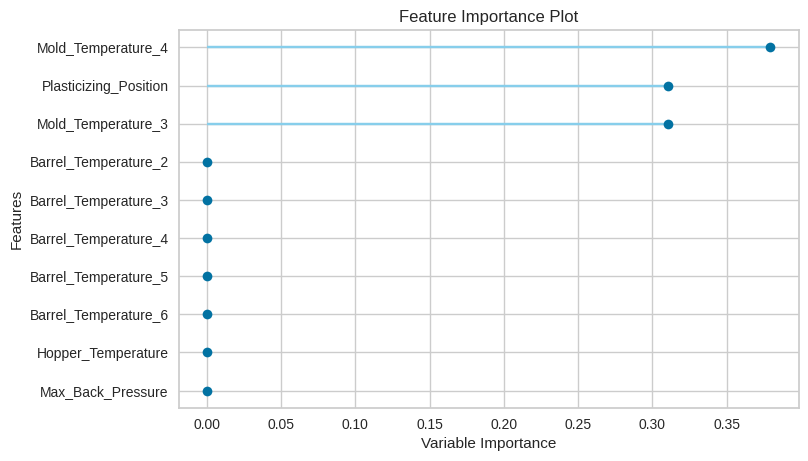

In [27]:
plot_model(tuned_randfor, plot = 'feature')

#Mold_Temperaure_4, Plasticizing_Position, Cushion_Position, Mold_Temperature_3, Clamp_Close_Time

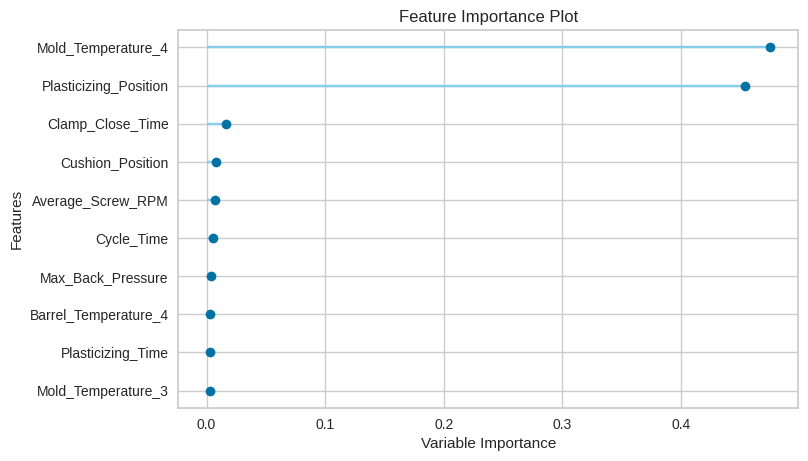

In [28]:
plot_model(tuned_xgb, plot = 'feature')

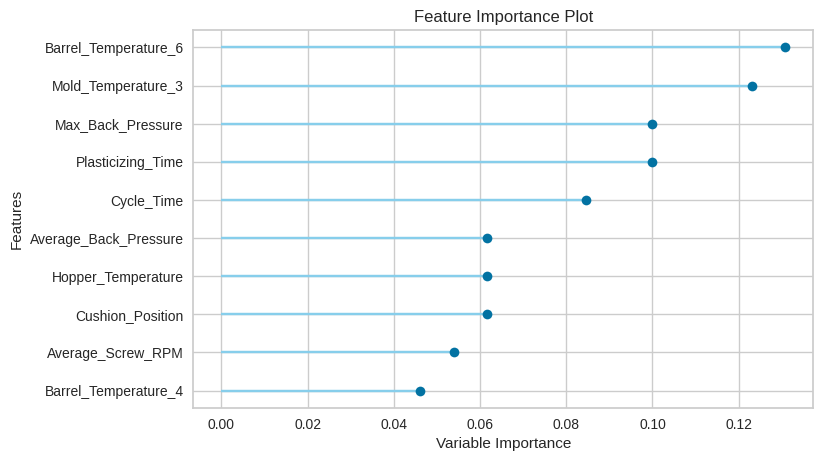

In [29]:
plot_model(tuned_adb, plot = 'feature')

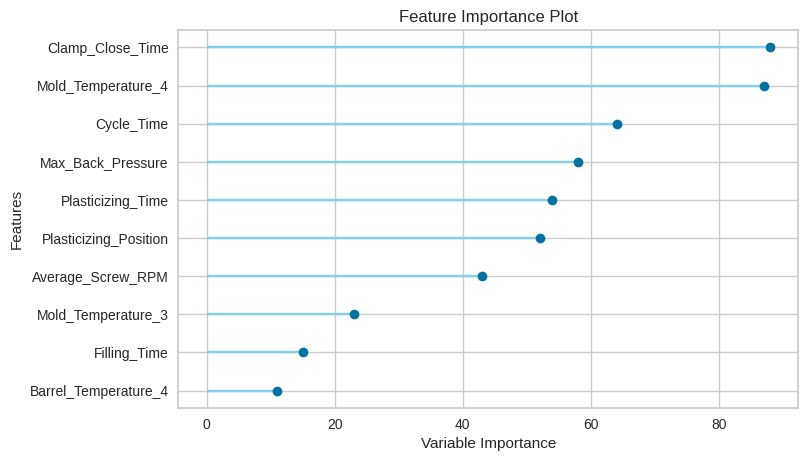

In [30]:
plot_model(tuned_lgbm, plot = 'feature')

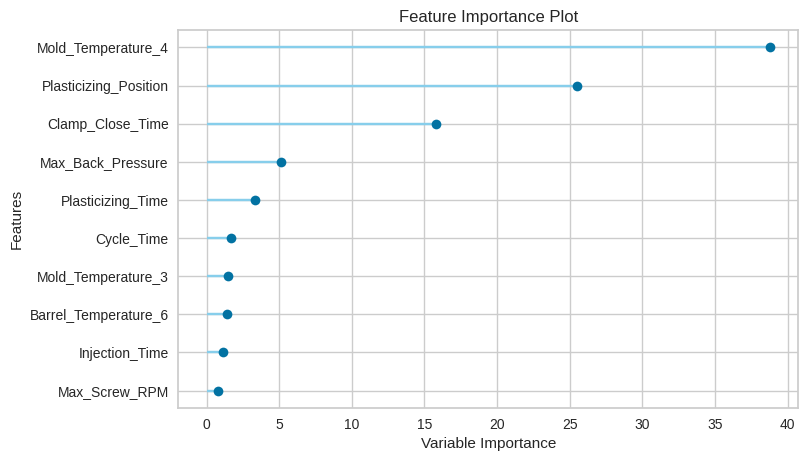

In [31]:
plot_model(tuned_catb, plot = 'feature')

In [32]:
unlabeled_randfor = predict_model(tuned_randfor, unlabeled)
unlabeled_tuned_xgb = predict_model(tuned_xgb, unlabeled)#
unlabeled_tuned_adb = predict_model(tuned_adb, unlabeled)#
unlabeled_tuned_lgbm = predict_model(tuned_lgbm, unlabeled)
unlabeled_tuned_catb = predict_model(tuned_catb, unlabeled)#

print(unlabeled_randfor.Label.value_counts())
print(unlabeled_tuned_xgb.Label.value_counts())
print(unlabeled_tuned_adb.Label.value_counts())
print(unlabeled_tuned_lgbm.Label.value_counts())
print(unlabeled_tuned_catb.Label.value_counts())

0    65535
1    17435
Name: Label, dtype: int64
0    82847
1      123
Name: Label, dtype: int64
0    82895
1       75
Name: Label, dtype: int64
0    79069
1     3901
Name: Label, dtype: int64
0    82914
1       56
Name: Label, dtype: int64
